## Breast Cancer Multi-Linear Logistic Regression
### Wrote a multi-linear logistic regression class from scratch (with the help of intro2ml) with methods including: forward, loss, gradient and gradient descent. 

### Created my own function to split the data based on a random seed. Ran the model for 2000 epochs and evaluated its performance at each epoch with the loss and accuracy. 

### Looped over 100 different data splits to create averages and plotted these metrics. 


In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import sklearn
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Turning to dataframe to visualise
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

# Visualise the dataset
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [4]:
# Show averages and standard deviations
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Everything from scratch

In [5]:
# Separate into features and target
x = data['data']
y = data['target']
print(x.shape, y.shape)

# Function which takes the x and y data and returns training and test sets according to desired proportions, as given by
# test set proportion. Seed is the random number seed to randomly shuffle the data before splitting. 
def split_dataset(x, y, test_set_proportion, seed):
    # Randomly split up the data into training and test sets
    rng = default_rng(seed)
    dataset_len = len(x)

    # How many data points in training and test set for the desired test set proportion
    n_test = int(test_set_proportion*dataset_len)
    n_train = dataset_len - n_test

    # Calculate random indices on which to split the data
    indices = rng.permutation(dataset_len)

    # Split the data
    x_train = x[indices[:n_train]]
    x_test = x[indices[n_train:]]

    y_train = y[indices[:n_train]]
    y_test = y[indices[n_train:]]

    # Check that the indices are in fact collecting all the data 
    # print(len(set(np.concatenate((indices[:n_train],indices[n_train:])))))

    # Perform standardisation
    x_train_mean, x_train_std = np.mean(x_train), np.std(x_train)
    x_test_mean, x_test_std = np.mean(x_test), np.std(x_test)

    x_train = (x_train - x_train_mean)/x_train_std
    x_test = (x_test - x_test_mean)/x_test_std
    
    # Include 1 for bias term 
    x_train = np.c_[x_train, np.ones(456)]
    x_test = np.c_[x_test, np.ones(113)]
          
    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = split_dataset(x, y, 0.2, 42)

(569, 30) (569,)


In [65]:
# Logistic regression/sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Returns the fraction of correct predictions 
def accuracyfunc(y_pred, y_true):
    correct = np.sum(y_pred == y_true)
    return correct/len(y_pred)

# Create Logistic Regression Class. 
class Logisticregressor:
    # Initiates the class. Takes x and y data as well as a random number generator. 
    def __init__(self, x, y, random_generator):
        rng = random_generator
        # Initiate the weights with random numbers
        self.w  = rng.random((31))
        # Set the final weight term to the bias (initialised as zero)
        self.w[-1] = 0
        
    # Defines the forward pass of the network, makes predictions on the target variable. Returns vector of proabilities. 
    # Matrix multiplication of the input data (x is a matrix of the input vectors: N x K where N = number of data points
    # and K = Number of features + Bias term = 31. For x_train, N = 456, K = 31.
    def forward(self, x):
        yhat = np.matmul(x, self.w)
        log_yhat = sigmoid(yhat)

        return log_yhat
        
    # Computes the loss of the network (a sum). We are using binary cross entropy.
    def loss(self, x, y):
        yhat = model.forward(x)
        loss = y*np.log(yhat) + (1-y)*np.log(1-yhat)
        
        return -np.sum(loss)/len(y)
    
    # Computes the gradient which is a vector of the differentials of the mean squared error between predicted value vs true value. 
    def gradient(self, x, y):
        yhat = model.forward(x)
        diff = yhat - y 
        # print(x.shape, diff.shape)
        # Calculates the gradient as the matrix multiplication of the difference between prediction and true y (vector)
        # and the datapoints x (matrix) 
        gradient = np.matmul(diff, x)
        
        return gradient
        
    # Performs gradient descent to update the parameters of the network. 
    def gradient_descent(self, x, y):
        grad = model.gradient(x, y)
        self.w = self.w - lr * grad

# Instantiates the model 
model = Logisticregressor(x_train, y_train, np.random.default_rng())

In [51]:
# This code runs a for loop over the desired number of epochs. It trains the network via batch gradient descent at each epoch
# (on the training set) then evaluates the model on the training set and test set. The loss and accuracy are calculated at each epoch.
# This is repeated for 100 different variations of randomly splitting the data into the training set and test set (similar to 
# cross validation). The reason I did this was because the test set was performing better than the training set and I wanted to 
# make sure there was not a bug. 

# Set the number of epochs
epochs = 2001
# Set the learning rate
lr = 0.0001
# Array of random seeds to change the splitting of the data into training and test set
random_seed_arr = np.arange(1,100,1)

# Set this to true to run the for loop
runforloop = False
if runforloop:
    # Create the matrices for accuracy and loss data for training and test set. Each row is for 2001 epochs for one split of the data
    train_accuracy_matrix = np.zeros(shape =(epochs, len(random_seed_arr)+1))
    test_accuracy_matrix = np.zeros(shape =(epochs, len(random_seed_arr)+1))
    train_loss_matrix = np.zeros(shape =(epochs, len(random_seed_arr)+1))
    test_loss_matrix = np.zeros(shape =(epochs, len(random_seed_arr)+1))

    # Loop over the 100 different data splits, determined by the random seed
    for i in random_seed_arr:
        # Create the x and y training and test sets 
        x_train, y_train, x_test, y_test = split_dataset(x, y, 0.2, i)

        # Create empty loss and accuracy arrays to fill at each epoch
        train_loss_array = np.zeros(epochs)
        train_accuracy_array = np.zeros(epochs)
        test_loss_array = np.zeros(epochs)
        test_accuracy_array = np.zeros(epochs)

        # Instantiate the model with a random seed. Could also change for the model as this will change how the weights 
        # are initialised and determine the performance of the model.
        model = Logisticregressor(x, y, np.random.default_rng(seed=12))

        # Loop over the epochs 
        for epoch in range (epochs):
            # Calculate the cross binary loss for the training set and insert into loss array
            train_error = model.loss(x_train, y_train)
            train_loss_array[epoch] = train_error
            # Make predictions, either 0 for no breast cancer or 1 for breast cancer
            train_predictions = np.round(model.forward(x_train))

            # Calculate the accuracy of predictions and insert into accuracy array
            train_accuracy = accuracyfunc(train_predictions, y_train)
            train_accuracy_array[epoch] = train_accuracy

            # Calculate the cross binary loss for the test set and insert into loss array
            test_error = model.loss(x_test, y_test)
            test_loss_array[epoch] = test_error
            # Make predictions, either 0 for no breast cancer or 1 for breast cancer
            test_predictions = np.round(model.forward(x_test))

            # Calculate the accuracy of predictions and insert into accuracy array
            test_accuracy = accuracyfunc(test_predictions, y_test)
            test_accuracy_array[epoch] = test_accuracy

            # Update the weights and biases to make better predictions at the next epoch 
            model.gradient_descent(x_train, y_train)
            # Print out the metrics at every 400 epochs when epoch > 100
            if epoch > 100: 
                if epoch % 400 == 0:   
                    print(f"Random Seed: {i} | Epoch: {epoch} | Train Loss: {train_error} | Train Accuracy: {train_accuracy}")
                    print(f"Random Seed: {i} | Epoch: {epoch} | Test Loss: {error} | Test Accuracy: {accuracy}")
            # Print out the metrics at every 10 epochs when < 100
            elif epoch % 10 == 0:
                print(f"Random Seed: {i} | Epoch: {epoch} | Train Loss: {train_error} | Train Accuracy: {train_accuracy}")
                print(f"Random Seed: {i} | Epoch: {epoch} | Test Loss: {test_error} | Test Accuracy: {test_accuracy}")
        # Fill the training, test set matrices with accuracy and loss
        train_accuracy_matrix[:,i] = train_accuracy_array
        train_loss_matrix[:,i] = train_loss_array

        test_accuracy_matrix[:,i] = test_accuracy_array
        test_loss_matrix[:,i] = test_loss_array
        

(2001, 100)
(2001,)


In [35]:
# Calculate the average accuracy and loss values for the 100 different data splits. 
avg_train_accuracy_array = np.average(train_accuracy_matrix, axis=1)
avg_test_accuracy_array = np.average(test_accuracy_matrix, axis=1)
avg_train_loss_array = np.average(train_loss_matrix, axis=1)
avg_test_loss_array = np.average(test_loss_matrix, axis=1)

In [50]:
# Calculate the average loss at the final epoch for all the 100 different data splits. This is a relative value. 
print(f"Final train loss: {round(avg_train_loss_array[-1], 3)}")
print(f"Final test loss: {round(avg_test_loss_array[-1],3)}")

# Calculate the average accuracy at the final epoch for all the 100 different data splits 

print(f"Final train accuracy: {round(avg_train_accuracy_array[-1], 3)}")
print(f"Final test loss: {round(avg_test_accuracy_array[-1], 3)}")

Final train loss: 0.2
Final test loss: 0.216
Final train accuracy: 0.912
Final test loss: 0.902


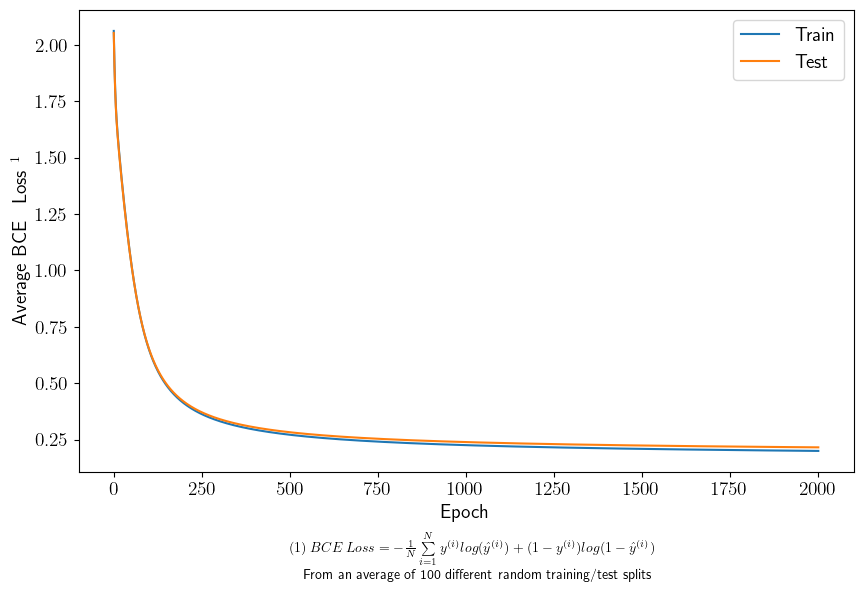

<Figure size 7680x5760 with 0 Axes>

In [60]:
# Create figures and axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.rcParams['text.usetex'] = True
plt.figure(dpi=1200)

# Plot the training, test loss
ax.plot(np.arange(0,epochs), avg_train_loss_array, label='Train');
ax.plot(np.arange(0,epochs), avg_test_loss_array, label = 'Test');

# Set labels, tick label size and legend 
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel(r'Average BCE \: Loss $^{1} $', size=14)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)

# Write text at the bottom 
ax.text(0.25*epochs, -0.25, r'$(1) \: BCE \: Loss = -\frac{1}{N}  \sum\limits_{i=1}^N     y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})  $ ');
ax.text(0.27*epochs, -0.37, 'From an average of 100 different random training/test splits');

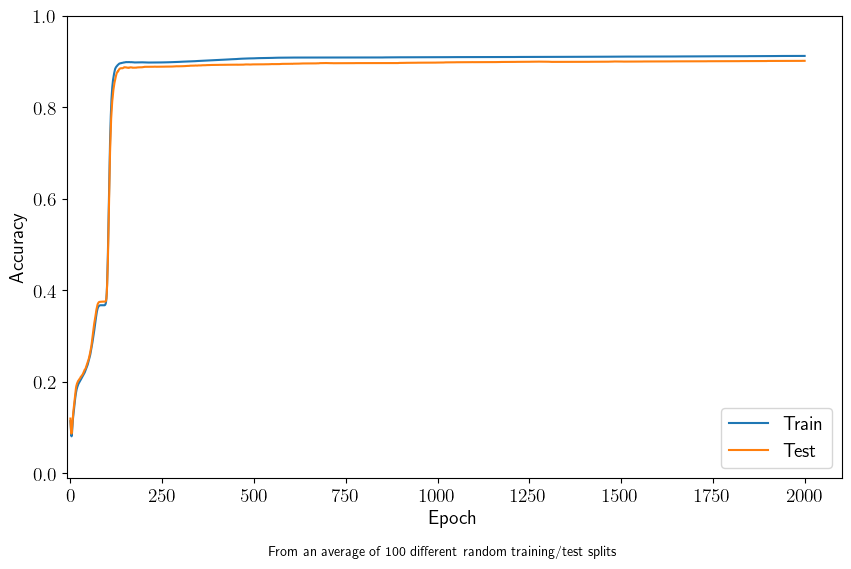

In [64]:
# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Plot the training, test accuracy
ax.plot(np.arange(0,epochs), avg_train_accuracy_array, label='Train');
ax.plot(np.arange(0,epochs), avg_test_accuracy_array, label='Test');

# Set the labels, legend and tick label size
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel('Accuracy', size=14)
ax.legend(fontsize=14, loc=4)
ax.tick_params(labelsize=14)

# Set the limits and write text at the bottom
ax.set_ylim(-0.01,1);
ax.set_xlim(-10,epochs+0.05*epochs);
ax.text(0.27*epochs, -0.18, 'From an average of 100 different random training/test splits') ;